Python version: 3.9+

Desc: learning how to use matplotlib using test data collected from 44 Boo observations

In [3]:
### imports
import os
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### A simple example
The basics of plotting with matplotlib

See (https://matplotlib.org/stable/_images/anatomy.png) for the parts of a figure

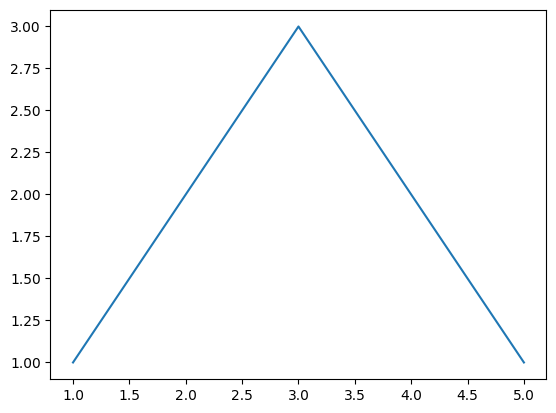

In [6]:
# create a figure containing a single axes
fig, ax = plt.subplots()

# plot some data on the axes
# the first list is a list of x coordinates
# the second list is a list of y coordinates for point pairs
ax.plot([1, 2, 3, 4, 5], [1, 2, 3, 2, 1])

<Figure size 640x480 with 0 Axes>

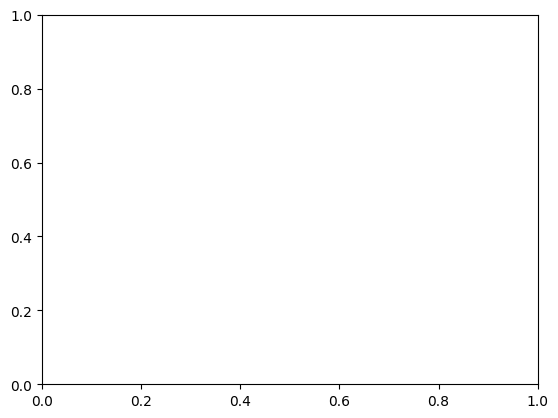

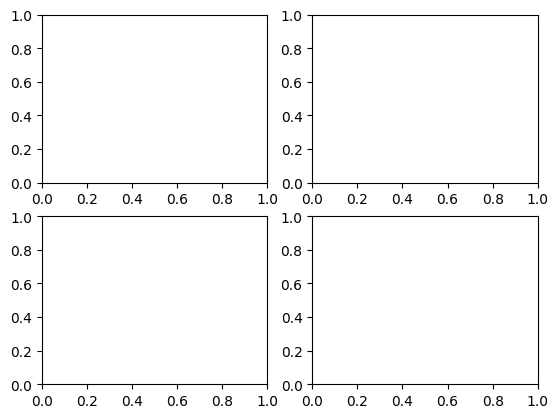

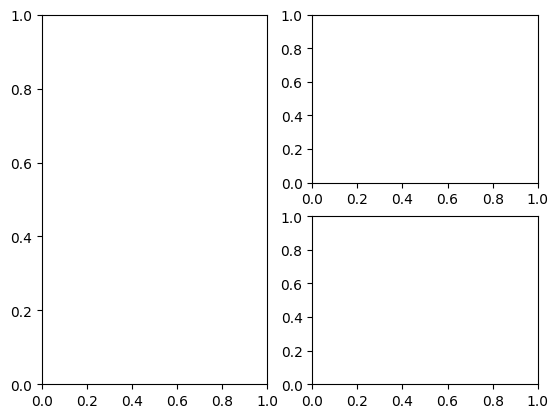

In [7]:
# an empty figure, with no axes can be made like so (wont display anything below)
fig = plt.figure()

# for a single axes (as above)
fig, ax = plt.subplots()

# for a 2x2 grid of axes
fig, axs = plt.subplots(2, 2)

# a figure with one axes on the left and two on the right
fig, axs = plt.subplot_mosaic([["left", "right-top"], ["left", "right_bottom"]])

Text(0, 0.5, 'entry b')

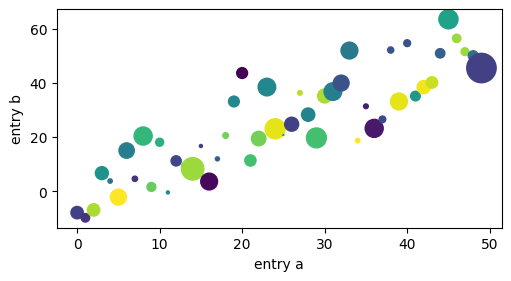

In [10]:
# plotting functions require numpy.array or numpy.ma.masked_array as input
# generate sample data into a dictionary
np.random.seed(69)
data = {"a": np.arange(50),
        "c": np.random.randint(0, 50, 50),
        "d": np.random.randn(50)}
data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.scatter("a", "b", c="c", s="d", data=data)
ax.set_xlabel("entry a")
ax.set_ylabel("entry b")

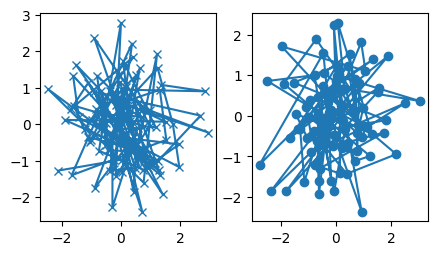

In [11]:
# creating helper functions to make the same plots over and over
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {"marker": "x"})
my_plotter(ax2, data3, data4, {"marker": "o"})

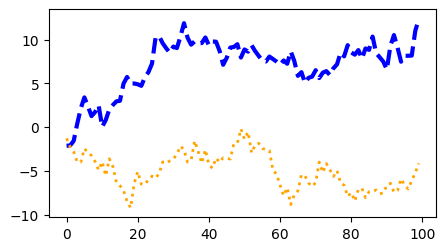

In [12]:
# most plotting methods have styling options for the Artists
fig, ax = plt.subplots(figsize=(5, 2.7))

x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color="blue", linewidth=3, linestyle="--")

l, = ax.plot(x, np.cumsum(data2), color="orange", linewidth=2)
l.set_linestyle(":")

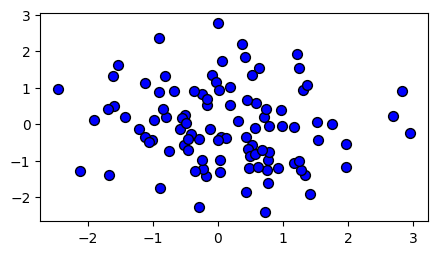

In [18]:
# there are many colors accepted by matplotlib
# RGB/RGBA as a 3/4 array, hex RGB/RGBA as string
# grayscale float value [0,1]
# single character shorthand for basic colors
# b -> blue (ex.)
# many more

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor="b", edgecolor=(0,0,0))

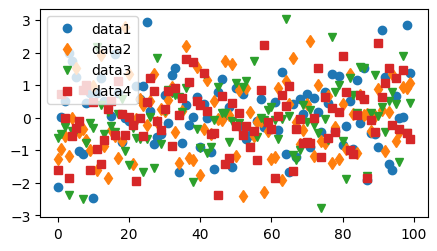

In [19]:
# line widths are typically in in typographic points (1pt = 1/72 in)

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")
ax.legend()

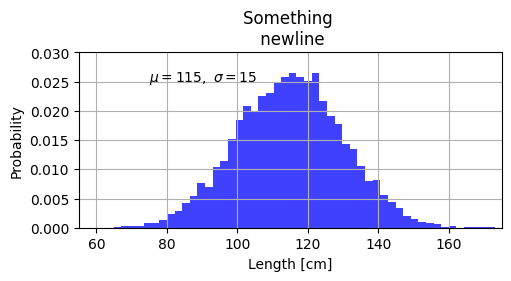

In [21]:
# plots can be labeled

mu = 115
sigma = 15

x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")

n, bins, patches = ax.hist(x, 50, density=True, facecolor="b", alpha=0.75)

ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title("Something \n newline")
ax.text(75, .025, r"$\mu=115,\ \sigma=15$")
ax.axis([55, 175, 0, 0.03])
ax.grid(True)